C:\Users\neetm\AppData\Local\Temp\ipykernel_18964\4132096805.py:11: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:178.)
  image = torch.from_numpy(np.asarray(image))


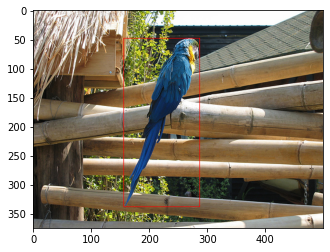

In [1]:
from torchvision.datasets import VOCDetection
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import torch
import numpy as np

t = transforms.Compose([transforms.ToTensor()])
ds = VOCDetection(r"E:\Deep Learning Projects\datasets", "2012", "trainval", False)
image, target = ds[51]
image = torch.from_numpy(np.asarray(image))
image = image.permute(2,0,1)
bb = target["annotation"]["object"][0]["bndbox"]
bb = torch.tensor([int(bb["xmin"]), int(bb["ymin"]), int(bb["xmax"]), int(bb["ymax"])])
bb.unsqueeze_(0)
bb_image = draw_bounding_boxes(image.to(torch.uint8), bb, colors="red")
plt.imshow(bb_image.permute(1,2,0))

In [2]:
a = set()
for i in ds:
    for j in i[1]['annotation']['object']:
        a.add(j['name'])
    

ParseError: no element found: line 1, column 0 (<string>)

In [17]:
len(a)

20

In [51]:
from torch.utils.data import Dataset
from torchvision.datasets import VOCDetection
from os.path import join as osp
import os
import torch
from torchvision.transforms import transforms
import math
to_tensor = transforms.Compose([transforms.ToTensor()])
classes = {
"aeroplane"     :0,
"bicycle"	    :1,
"bird"	        :2,
"boat"	        :3,
"bottle"        :4,	
"bus"	        :5,
"car"	        :6,
"cat"	        :7,
"chair"	        :8,
"cow"	        :9,
"diningtable"   :10,	
"dog"           :11,
"horse"	        :12,
"motorbike"     :13,	
"person"	    :14,
"pottedplant"   :15,
"sheep"	        :16,
"sofa"	        :17,
"train"	        :18,
"tvmonitor"     :19
}

class VOC(VOCDetection):

    def __init__(self, datadir, S, C, B=2, image_set='train', transform=to_tensor, download=False) -> None:
        super(VOC, self).__init__(root=datadir, image_set=image_set, download=download, transform=transform)
        self.S = S
        self.C = C
        self.B = B

    def __getitem__(self, index: int):
        image, target = super().__getitem__(index)
        c, h, w = image.shape 
        print(target)
        object_list = target['annotation']["object"]
        # print(object_list)
        # print(h,w)
        bbox = [(classes[i['name']],i['bndbox']) for i in object_list]
        bbox = [(i[0],[int(i[1]['xmin']), int(i[1]['ymin']),int(i[1]['xmax']),int(i[1]['ymax'])]) for i in bbox]
        tgt = self._xml2yolo(bbox, h, w)
        # C,Y,X = image.shape
        return image, bbox, tgt

    def _xml2yolo(self, bbox, h, w):
        tgt = torch.zeros((self.S[0], self.S[1], self.C+5))
        cell_h = 1./self.S[0]
        cell_w = 1./self.S[1]
        for class_no, (xmin, ymin, xmax, ymax) in bbox:
            x_grid = (xmax+xmin)/2/w
            y_grid = (ymax+ymin)/2/h
            h_grid = (ymax-ymin)/h
            w_grid = (xmax-xmin)/w

            i = math.ceil(y_grid/cell_h)-1
            j = math.ceil(x_grid/cell_w)-1
            tgt[i,j,class_no] = 1
            tgt[i,j,20] = 1
            tgt[i,j,21] = (x_grid - j*cell_w)/cell_w
            tgt[i,j,22] = (y_grid - i*cell_h)/cell_h
            tgt[i,j,23] = w_grid
            tgt[i,j,24] = h_grid

        return tgt



        
        


{'annotation': {'folder': 'VOC2012', 'filename': '2008_000207.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '334', 'height': '500', 'depth': '3'}, 'segmented': '1', 'object': [{'name': 'person', 'pose': 'Frontal', 'truncated': '0', 'occluded': '0', 'bndbox': {'xmin': '72', 'ymin': '54', 'xmax': '253', 'ymax': '434'}, 'difficult': '0'}]}}
{'annotation': {'folder': 'VOC2012', 'filename': '2008_000207.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '334', 'height': '500', 'depth': '3'}, 'segmented': '1', 'object': [{'name': 'person', 'pose': 'Frontal', 'truncated': '0', 'occluded': '0', 'bndbox': {'xmin': '72', 'ymin': '54', 'xmax': '253', 'ymax': '434'}, 'difficult': '0'}]}}


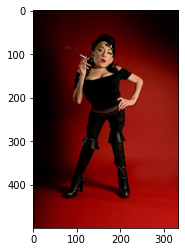

In [56]:
import matplotlib.pyplot as plt
ds = VOC(r"E:\Deep Learning Projects\datasets", S=(14,14), C=20)
plt.imshow(ds[50][0].permute(1,2,0))
y = ds[50][2]

In [57]:
torch.where(y>0)

(tensor([6, 6, 6, 6, 6, 6]),
 tensor([6, 6, 6, 6, 6, 6]),
 tensor([14, 20, 21, 22, 23, 24]))

In [59]:
y[6,6,:]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.8114, 0.8320, 0.5419, 0.7600])